# Linear Regression

## Imports

In [52]:
import random
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

## Load data

Define the path to the file containing the data

In [53]:
datafile = "lausanne-appart.csv"

Read the data

In [54]:
dataset = pd.read_csv(datafile)

Display first rows

In [55]:
dataset.head()

,living_area,nb_rooms,rent_price
0,69,3.0,1810
1,95,3.5,2945
2,21,1.5,685
3,20,1.0,720
4,33,1.5,830


In [56]:
# get numpy arrays from panda objects
rent_price = dataset.rent_price.values
living_area = dataset.living_area.values
print(type(rent_price))
print(rent_price.shape, living_area.shape)

<class 'numpy.ndarray'>
(201,) (201,)


## Part 1 - Visualize the data

a) Plot a histogram to visualize the distribution of the renting price

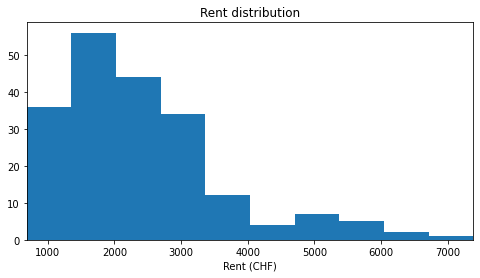

In [57]:
plt.figure(1, figsize=(8, 4))
plt.hist(rent_price)
plt.xlabel("Rent (CHF)")
plt.title("Rent distribution")
plt.xlim(np.min(rent_price), np.max(rent_price))
plt.show()

b) Plot a histogram to visualize the distribution of the living area

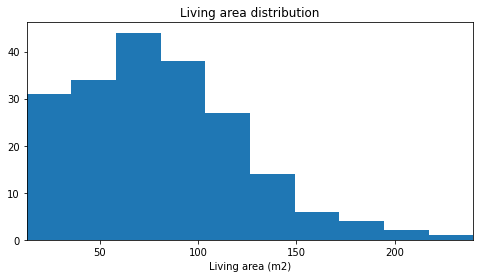

In [58]:
# Your code here
plt.figure(1, figsize=(8, 4))
plt.hist(living_area)
plt.xlabel("Living area (m2)")
plt.title("Living area distribution")
plt.xlim(np.min(living_area), np.max(living_area))
plt.show()

c) Plot a scatter plot of renting price as a function of living area

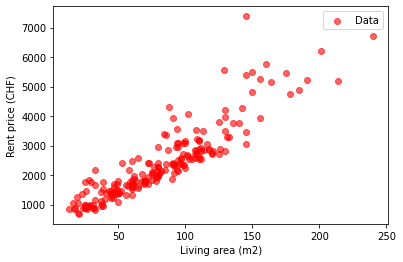

In [59]:
# Your code here


fig, ax = plt.subplots()
ax.scatter(living_area, rent_price, marker="o", color="red", alpha=0.6, label="Data")
ax.set_xlabel("Living area (m2)")
ax.set_ylabel("Rent price (CHF)")
plt.legend()
plt.show()

## Part 2 - Normal equations for linear regression - using numpy arrays

a) Implement the closed form solution to this problem using the following normal equation:

<div><div style="display: table-cell; width: 100%;"><center>$\theta = (X^{T}X)^{-1}X^{T}\vec{y}$</center></div><div style="display: table-cell; width: 100%;">$(3)$</div></div>

Assuming $x$ is the living area and $y$ is the renting price. Use `numpy` for the vector operations. Plot the computed line on top of the scatter plot of exercise 1.

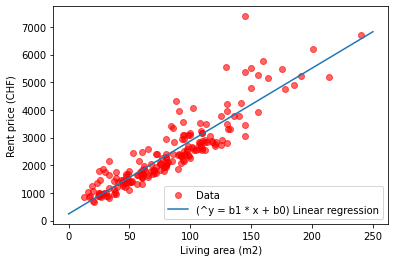

In [60]:
# Your code here

x = living_area
y = rent_price

X = np.ones((rent_price.shape[0], 2))

X[:, 1] = living_area

Xt = X.T
y = rent_price

XtX = Xt.dot(X)
inverse = np.linalg.inv(XtX)

inverse_Xt = inverse.dot(Xt)
teta = inverse_Xt.dot(y)

x_teta = np.linspace(0, 250, 100)

y_teta = teta[1] * x_teta + teta[0]

fig, ax = plt.subplots()
ax.scatter(living_area, rent_price, marker="o", color="red", alpha=0.6, label="Data")
ax.set_xlabel("Living area (m2)")
ax.set_ylabel("Rent price (CHF)")
ax.plot(x_teta, y_teta, label="(^y = b1 * x + b0) Linear regression")

plt.legend()
plt.show()

b) Compute the overall cost value according to the following equation:

<div><div style="display: table-cell; width: 100%;"><center>$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$</center></div><div style="display: table-cell; width: 100%;">$(2)$</div></div>

In [61]:
# Your code here

def calculate_cost(x, t0, t1):
    s = []
    for i in range(len(x)):
        ht = t0+t1*x[i]
        si = (ht - y[i])**2
        s.append(si)
    return sum(s)/(2*len(x))

cost = calculate_cost(x, teta[0], teta[1])
print("Overall Cost: ", round(cost, 4), " CHF")


Overall Cost:  138034.9578  CHF


## Part 3 - Normal equations for linear regression - using pytorch tensors

Redo the part 2, this time using pytorch tensors.

New tensor teta:
tensor([240.0768,  26.3324])


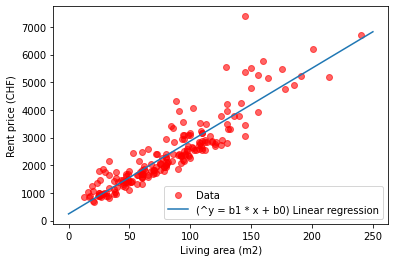

Overall Cost:  138034.9375  CHF


In [62]:
# Your code here
import torch

rent_price.shape

X = torch.ones((rent_price.shape[0], 2))

X[:, 1] = torch.from_numpy(living_area)

Xt = torch.t(X)
y = torch.from_numpy(rent_price)
y = y.type(torch.FloatTensor)

XtX = torch.matmul(Xt, X)
inverse = torch.inverse(XtX)

inverse_Xt = torch.matmul(inverse, Xt)

# alternative to matmul but equal
teta = inverse_Xt @ (y)

print("New tensor teta:")
print(teta)

x_teta = np.linspace(0, 250, 100)

y_teta = teta[1] * x_teta + teta[0]

fig, ax = plt.subplots()
ax.scatter(living_area, rent_price, marker="o", color="red", alpha=0.6, label="Data")
ax.set_xlabel("Living area (m2)")
ax.set_ylabel("Rent price (CHF)")
ax.plot(x_teta, y_teta, label="(^y = b1 * x + b0) Linear regression")

plt.legend()
plt.show()

t0 = teta[0]
t1 = teta[1]

cost = calculate_cost(x, teta[0], teta[1])
print("Overall Cost: ",round(cost.item(), 4), " CHF")


### Alternative torch solution (video tensor fleuret)

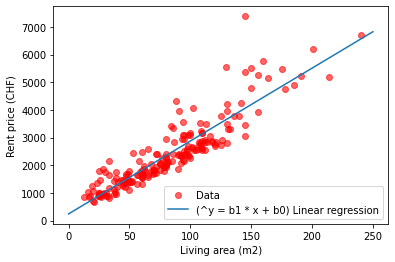

Overall Cost:  187849792.0  CHF


In [63]:
rent_price = dataset.rent_price.values
living_area = dataset.living_area.values

x, y = torch.empty(rent_price.shape[0], 2), torch.empty(rent_price.shape[0], 1)

x[:, 0] = torch.from_numpy(living_area)
x[:, 1] = 1

y[:, 0] = torch.from_numpy(rent_price)


alpha, _ = torch.lstsq(y, x)

a, b = alpha[0, 0].item(), alpha[1, 0].item()

x_teta = np.linspace(0, 250, 100)

y_teta = a * x_teta + b

fig, ax = plt.subplots()
ax.scatter(living_area, rent_price, marker="o", color="red", alpha=0.6, label="Data")
ax.set_xlabel("Living area (m2)")
ax.set_ylabel("Rent price (CHF)")
ax.plot(x_teta, y_teta, label="(^y = b1 * x + b0) Linear regression")

plt.legend()
plt.show()

cost = calculate_cost(living_area, a, b)
print("Overall Cost: ",round(cost.item(), 4), " CHF")
